In [22]:
import tensorflow as tf
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt

(450, 2) (450,)


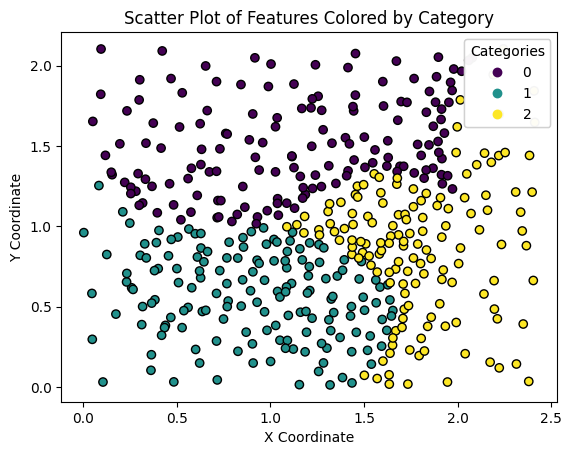

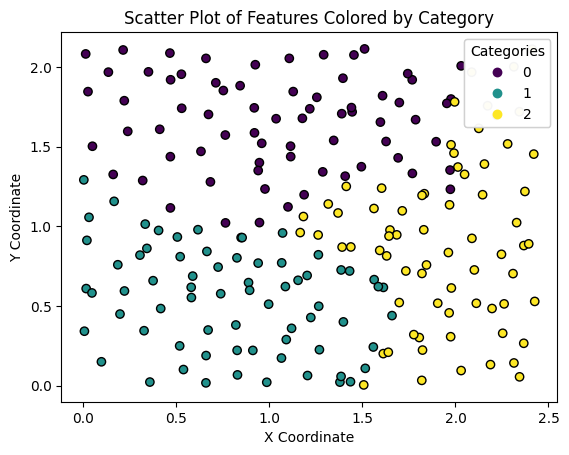

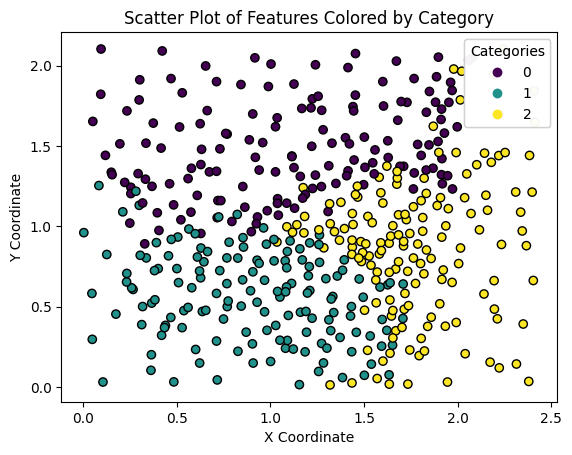

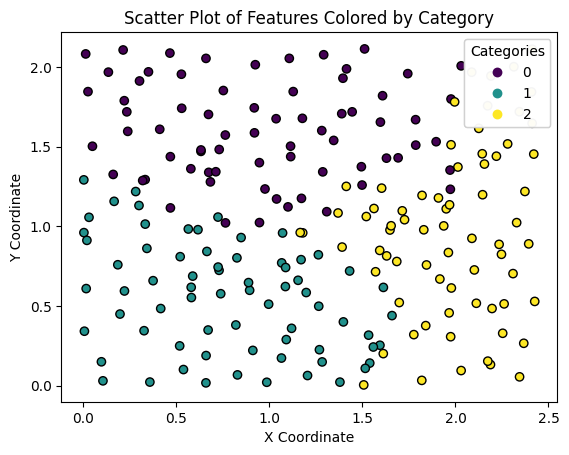

In [23]:
def load_data(file_path: str, shuffle: bool = True, batch_size: int = 64) -> Tuple[np.ndarray, np.ndarray]:
    data = np.loadtxt(file_path, delimiter=' ')
    if shuffle:
        np.random.shuffle(data)

    x_train = data[:, :-1]
    y_train = data[:, -1].astype(int)
    return x_train, y_train

def data_plot(features, labels):
    fig, ax = plt.subplots()
    # Create a scatter plot, coloring by label
    scatter = ax.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolor='k')
    
    # Add a legend
    # This part creates handles (color patches) for the legend
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Categories")
    ax.add_artist(legend1)
    
    # Add axis labels and a title for good measure
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Scatter Plot of Features Colored by Category')
    plt.show()


batch_size = 64
shuffle = True
x_train, y_train = load_data("./insects/insects-training.txt", shuffle=shuffle, batch_size=batch_size)
x_test, y_test = load_data("./insects/insects-testing.txt", shuffle=shuffle, batch_size=batch_size)
x_train_distortion, y_train_distortion = load_data("./insects/insects-2-training.txt", shuffle=shuffle, batch_size=batch_size)
x_test_distortion, y_test_distortion = load_data("./insects/insects-2-testing.txt", shuffle=shuffle, batch_size=batch_size)

print(x_train.shape, y_train.shape)
data_plot(x_train, y_train)
data_plot(x_test, y_test)
data_plot(x_train_distortion, y_train_distortion)
data_plot(x_test_distortion, y_test_distortion)

In [24]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(200, activation='relu'),
    # tf.keras.layers.Dense(200, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)
])

In [25]:
predictions = model(x_train[:1]).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(tf.nn.softmax(predictions).numpy())
prediction_loss = loss_fn(y_train[:1], predictions).numpy()
print(predictions, prediction_loss)

[[0.32791802 0.51814604 0.15393595]]
[[ 0.11478823  0.5722816  -0.6414387 ]] 0.6574982


In [26]:
def print_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # Plotting the training and validation accuracy
    plt.figure(figsize=(10, 5))
    
    # Plot training and validation accuracy per epoch
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training and validation loss per epoch
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3793 - loss: 1.1669 - val_accuracy: 0.3429 - val_loss: 1.0769
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3439 - loss: 1.1287 - val_accuracy: 0.6476 - val_loss: 1.0607
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3411 - loss: 1.1071 - val_accuracy: 0.7952 - val_loss: 1.0322
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3455 - loss: 1.0901 - val_accuracy: 0.5143 - val_loss: 1.0174
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3983 - loss: 1.0737 - val_accuracy: 0.5381 - val_loss: 1.0006
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4827 - loss: 1.0303 - val_accuracy: 0.7524 - val_loss: 0.9746
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4605 - loss: 1.0276 - val_accuracy: 0.7143 - val_loss: 0.9585
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4982 - loss: 1.0016 - val_accuracy:

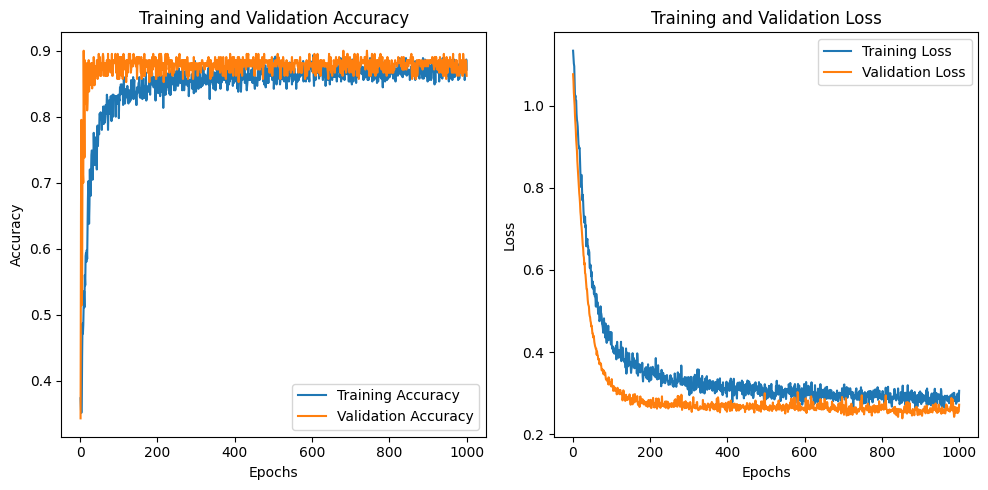

In [27]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
print_history(history)

In [28]:
history = model.fit(x_train_distortion, y_train_distortion, epochs=1000, validation_data=(x_test_distortion, y_test_distortion))
print_history(history)
model.evaluate(x_test_distortion, y_test_distortion)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8294 - loss: 0.4103 - val_accuracy: 0.8810 - val_loss: 0.2565
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8545 - loss: 0.3151 - val_accuracy: 0.8857 - val_loss: 0.2601
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8566 - loss: 0.3422 - val_accuracy: 0.8905 - val_loss: 0.2810
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8699 - loss: 0.3416 - val_accuracy: 0.8952 - val_loss: 0.2675
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8179 - loss: 0.3763 - val_accuracy: 0.8952 - val_loss: 0.2709
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8542 - loss: 0.3475 - val_accuracy: 0.8952 - val_loss: 0.2773
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8580 - loss: 0.3245 - val_accuracy: 0.9000 - val_loss: 0.2706
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8506 - loss: 0.3620 - val_accuracy: 

KeyboardInterrupt: 